In [6]:
FEATURES_LIMIT=5
DATA_PATH="/Users/phuongnm/Downloads/sensor_data_analysis/test_data_02_28/No normalized"


In [7]:
import os
import glob
import numpy as np 
import pandas as pd 

all_data = {'odd': {'labels': [], 'values': [], 'file_name': []},
            'even': {'labels': [], 'values': [], 'file_name': []}}
for file_name in glob.glob(f"{DATA_PATH}/*.csv"):
    # check odd or even in file name
    idx = int(file_name[:-4].split("_")[-1])
    if idx % 2 == 1:
        data_storage = all_data['odd']
    else:
        data_storage = all_data['even']

    data_storage['file_name'].append(file_name)

    # load data to get label
    label = file_name.split("/")[-1][:-4]
    data_storage['labels'].append(label)

    # load real values
    df = pd.read_csv(open(file_name), header=0)

    def filter_fn(row):
        return row

    df = df.apply(filter_fn, axis=1)
    values = df[df.columns[0]].tolist()
    data_storage['values'].append(np.array(values[:FEATURES_LIMIT]))


In [8]:
print("Object labels:")
all_data['odd']['labels']

Object labels:


['P40_c_19',
 'P40_a_09',
 'P40_a_19',
 'P40_c_09',
 'P40_b_05',
 'P40_b_11',
 'P40_b_07',
 'P40_b_13',
 'P40_b_17',
 'P40_b_03',
 'P40_b_15',
 'P40_b_01',
 'P40_b_19',
 'P40_b_09',
 'P40_c_13',
 'P40_c_07',
 'P40_a_03',
 'P40_a_17',
 'P40_a_01',
 'P40_a_15',
 'P40_c_11',
 'P40_c_05',
 'P40_c_01',
 'P40_c_15',
 'P40_a_11',
 'P40_a_05',
 'P40_a_13',
 'P40_a_07',
 'P40_c_03',
 'P40_c_17']

label_map= {'P40_c': 0, 'P40_b': 1, 'P40_a': 2}
label_map= {'P40_c': 0, 'P40_b': 1, 'P40_a': 2}


/Users/phuongnm/miniconda3/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/phuongnm/miniconda3/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


<Figure size 576x432 with 0 Axes>

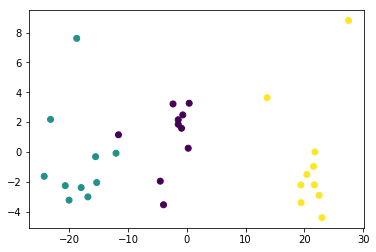

<Figure size 576x432 with 0 Axes>

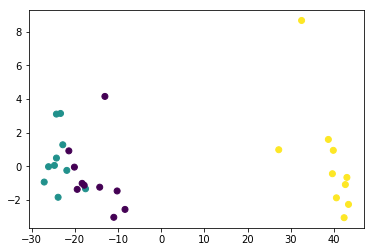

In [9]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

for type_file in ['odd', 'even']:
    # label map for coloring
    label_map = dict([
        (v, i) for i, v in enumerate(
            list(set("_".join(e.split("_")[:-1]) for e in all_data[type_file]['labels'])) # remove the last component in file name (*_00, *_01, ...)
        )])
    X, labels =  all_data[type_file]['values'], all_data[type_file]['labels']
    print('label_map=',label_map)

    reduce_processor = PCA()
    # reduce_processor = TSNE(n_components=2, verbose=1, random_state=123, n_iter=6000)

    pipe = Pipeline([
                    # ('scaler', StandardScaler()),
                    ('pca', reduce_processor)])
    plt.figure(figsize=(8,6))
    Xt = pipe.fit_transform(X)


    plot, ax = plt.subplots()
    ax.scatter(Xt[:,0], Xt[:,1], 
            # alpha=hue,
            c=[ label_map["_".join(e.split("_")[:-1])] for e in labels]
            )


    # for i, txt in enumerate(labels):
    #     ax.text(Xt[i,0]+.04, Xt[i,1]+.04, txt, fontsize=9)
    plot.show()
    plot.savefig(f'{str(reduce_processor)[:3]}.{type_file}.pdf')